In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("final_data.csv")

In [3]:
df.head()

,mni_no,dedupe_id,dob,sex,race,mar_stat,city,state,zip,case_no,...,bail_amt,bailed_out,pri_dx_value,refferal_source,mh_treatment,re_entry,age,after_released,within_one,within_two
0,494625,131.0,1990-05-31,MALE,WHITE,S,OLATHE,KS,66062.0,11CR02750,...,NaN,0,UNSPECIFIED AFFECTIVE PSYCHOSIS,NaN,0,1,22.0,138.0,1,1
1,494625,131.0,1990-05-31,MALE,WHITE,S,OLATHE,KS,66062.0,14CR01019,...,1500.0,1,UNSPECIFIED AFFECTIVE PSYCHOSIS,NaN,0,1,24.0,557.0,0,1
2,494625,131.0,1990-05-31,MALE,WHITE,S,OLATHE,KS,66062.0,14CR02622,...,5000.0,1,UNSPECIFIED AFFECTIVE PSYCHOSIS,NaN,0,1,24.0,198.0,1,1
3,673675,309.0,1978-04-07,MALE,WHITE,S,OLATHE,KS,66061.0,15DV00382,...,1000.0,1,UNSPECIFIED AFFECTIVE PSYCHOSIS,NaN,0,1,37.0,386.0,0,1
4,673675,309.0,1978-04-07,MALE,WHITE,S,OLATHE,KS,66061.0,16DV00234,...,NaN,0,UNSPECIFIED AFFECTIVE PSYCHOSIS,NaN,0,1,38.0,334.0,1,1


In [4]:
acs = pd.read_csv("fips_acs.csv")

In [5]:
acs.head()

,zip,latitude,longitude,fips,per_capita_income,poverty_stat,household_income,mortgage_stat,school_enrollment_16-19,own_children_under18,SSI_income,grandparent_care,military_service,education_25,property_value_occupied,retirement_income,rent_over_income
0,66062,38.860511,-94.77581,200910535072001,29721.0,1177,407,371,59,327,407,706,91,773,371,407,36
1,66061,38.889784,-94.85558,200910528012016,36605.0,1571,475,461,82,576,475,847,77,958,461,475,14
2,64111,39.056505,-94.59439,290950168004006,31496.0,1210,811,110,0,31,811,634,111,981,110,811,701
3,66101,39.118054,-94.62568,202090418001004,11478.0,985,626,31,25,67,626,717,95,745,31,626,595
4,66205,39.030172,-94.63097,200910501005009,29905.0,1108,420,398,35,266,420,698,87,752,398,420,22


In [6]:
total = pd.merge(df, acs, on='zip', how='inner')

In [7]:
total.shape

(24433, 43)

In [8]:
total.columns

Index(['mni_no', 'dedupe_id', 'dob', 'sex', 'race', 'mar_stat', 'city',
       'state', 'zip', 'case_no', 'case_type', 'booking_no',
       'arresting_agency', 'arresting_agency_type', 'booking_date',
       'release_date', 'bail_type', 'bail_amt', 'bailed_out', 'pri_dx_value',
       'refferal_source', 'mh_treatment', 're_entry', 'age', 'after_released',
       'within_one', 'within_two', 'latitude', 'longitude', 'fips',
       'per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income'],
      dtype='object')

In [9]:
df = total.copy()

In [10]:
cd ../code

/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final
import final_pipeline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in

In [12]:
DROP = (jocojims.DROP_COLS)

In [13]:
DROP.remove('release_date')
DROP.remove('dedupe_id')
print(DROP)

['re_entry', 'mni_no', 'dob', 'state', 'city', 'zip', 'case_no', 'booking_no', 'after_released']


In [14]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', DROP)
df = df.drop(DROP, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dob', 'state', 'city', 'zip', 'case_no', 'booking_no', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type', 'pri_dx_value', 'refferal_source']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [15]:
from IPython.display import display

2015-04-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
42,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min...",0.932505,1.000000,0.198529,0.052174,0.099174
91,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.842443,0.833333,0.183824,0.043478,0.082645
63,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'auto', 'n_neighbors': 100, 'wei...",0.744513,1.000000,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.500000,1.000000,0.198529,0.052174,0.099174
4,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.734161,1.000000,0.198529,0.052174,0.099174


Feature ranking for within_1yrs
1. bailed_out (0.099798)
2. pri_dx_valueBIPOLAR DISORDER, MANIC IN PARTIAL REMISSION (0.061490)
3. arresting_agencyMERRIAM P.D. (0.059235)
4. poverty_stat_bin1 (0.051630)
5. arresting_agency_typeCOUNTY SHERIFF (0.042852)
6. SSI_income_bin2 (0.039058)
7. rent_over_income_bin1 (0.037856)
8. household_income_bin1 (0.034271)
9. arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT (0.032329)
10. rent_over_income_bin3 (0.030470)


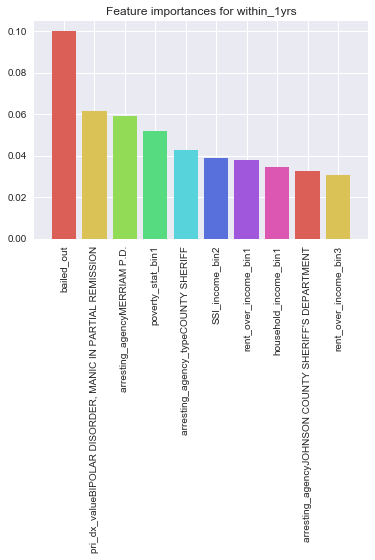

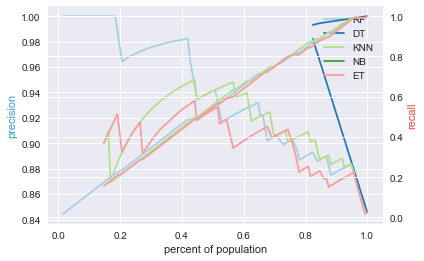

2014-10-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
37,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.969772,1.0,0.198529,0.052174,0.099174
119,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'entropy', 'max_depth': 50, 'max...",0.699172,1.0,0.198529,0.052174,0.099174
63,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'auto', 'n_neighbors': 100, 'wei...",0.639337,1.0,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.382609,1.0,0.198529,0.052174,0.099174
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.742857,1.0,0.198529,0.052174,0.099174


Feature ranking for within_1yrs
1. arresting_agencyMERRIAM P.D. (0.036236)
2. arresting_agencyOLATHE P.D. (0.028950)
3. arresting_agency_typeCOUNTY SHERIFF (0.026891)
4. bail_typeSUR (0.026828)
5. pri_dx_valueIMPULSE CONTROL DISORDER, UNSPECIFIED (0.024083)
6. age_bin3 (0.024072)
7. bail_amt_bin2 (0.021800)
8. mh_treatment (0.021214)
9. bailed_out (0.020723)
10. age_bin1 (0.020388)


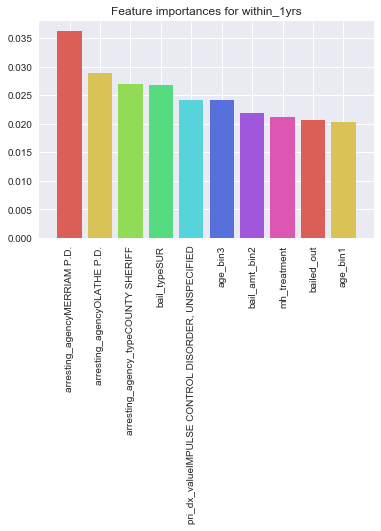

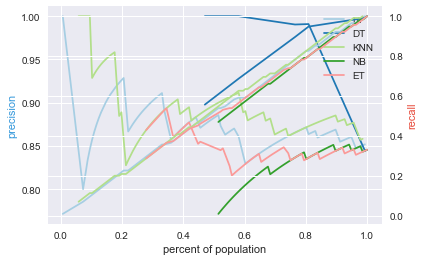

2014-04-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
25,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.651967,1.0,0.198529,0.052174,0.099174
95,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.739545,1.0,0.198529,0.052174,0.099174
63,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'auto', 'n_neighbors': 100, 'wei...",0.673706,1.0,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.334161,1.0,0.198529,0.052174,0.099174
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.699586,1.0,0.198529,0.052174,0.099174


Feature ranking for within_1yrs
1. sexMALE (0.103801)
2. pri_dx_valueMAJOR DEPRESSIVE DISORDER, SINGLE EPISODE, MODERATE (0.072825)
3. pri_dx_valueBIPOLAR DISORDER, MANIC IN PARTIAL REMISSION (0.058993)
4. military_service_bin1 (0.053863)
5. household_income_bin3 (0.038652)
6. per_capita_income_bin4 (0.037481)
7. age_bin2 (0.028796)
8. rent_over_income_bin1 (0.027544)
9. age_bin1 (0.023845)
10. case_typeCR (0.023734)


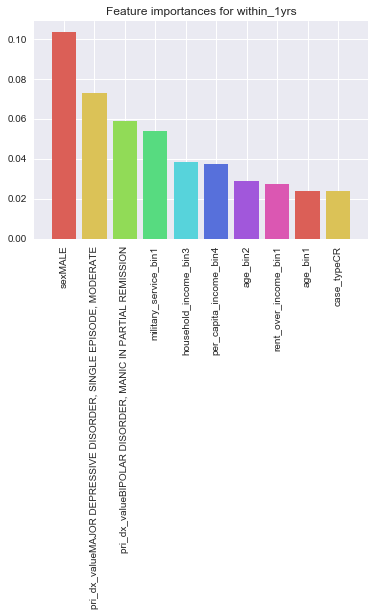

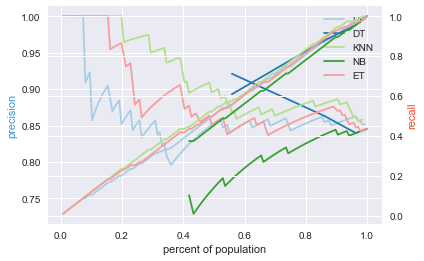

2013-10-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
47,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 50, 'min...",0.639752,1.0,0.198529,0.052174,0.099174
111,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.671429,1.0,0.198529,0.052174,0.099174
63,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'auto', 'n_neighbors': 100, 'wei...",0.649689,1.0,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.313043,1.0,0.198529,0.052174,0.099174
2,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.614493,1.0,0.198529,0.052174,0.099174


Feature ranking for within_1yrs
1. case_typeCR (0.097708)
2. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.063862)
3. pri_dx_valueOTHER SPECIFIED EARLY CHILDHOOD PSYCHOSES, CURRENT (0.052063)
4. arresting_agency_typeOTHER AGENCY (0.048790)
5. pri_dx_valueDEPRESSIVE DISORDER NOS (0.045680)
6. refferal_sourceOTHERS (0.035824)
7. age_bin1 (0.031125)
8. sexMALE (0.028747)
9. mh_treatment (0.026157)
10. arresting_agency_typeCOUNTY SHERIFF (0.023094)


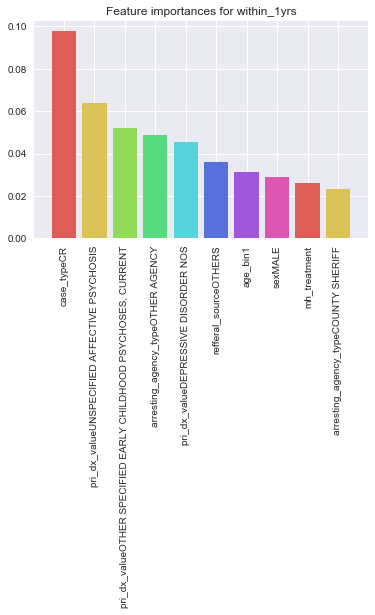

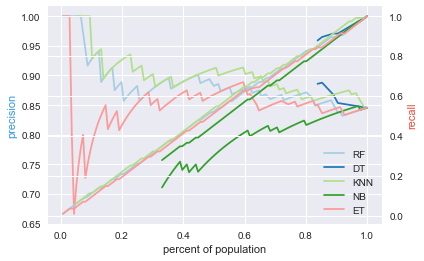

2013-04-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
41,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min...",0.709110,1.000000,0.198529,0.052174,0.099174
89,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.569358,0.666667,0.169118,0.034783,0.066116
63,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'auto', 'n_neighbors': 100, 'wei...",0.536232,1.000000,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.349275,1.000000,0.198529,0.052174,0.099174
10,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.609938,1.000000,0.198529,0.052174,0.099174


Feature ranking for within_1yrs
1. refferal_sourceOTHERS (0.095695)
2. pri_dx_valueOTHER SPECIFIED EARLY CHILDHOOD PSYCHOSES, CURRENT (0.070375)
3. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.069783)
4. case_typeCR (0.037660)
5. sexMALE (0.031481)
6. mh_treatment (0.029461)
7. bail_typeSUR (0.029275)
8. pri_dx_valuePANIC DISORDER [EPISODIC PAROXYSMAL ANXIETY] WITHOUT AGORAPHOBIA (0.028461)
9. pri_dx_valueBIPOLAR DISORD, CRNT EPISODE MIXED, SEVERE, W PSYCH FEATURES (0.027962)
10. age_bin2 (0.023536)


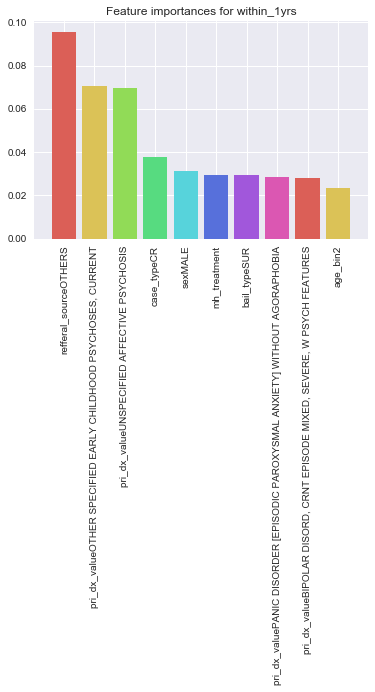

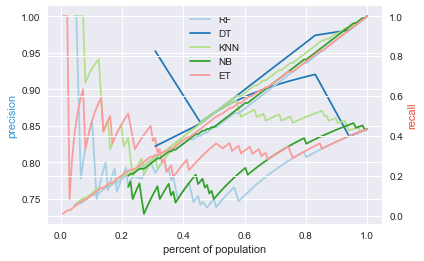

2012-10-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
25,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.705797,1.000000,0.198529,0.052174,0.099174
115,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'entropy', 'max_depth': 50, 'max...",0.508282,1.000000,0.198529,0.052174,0.099174
63,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'auto', 'n_neighbors': 100, 'wei...",0.553623,1.000000,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.279089,1.000000,0.198529,0.052174,0.099174
6,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'log2', 'min_...",0.569358,0.833333,0.183824,0.043478,0.082645


Feature ranking for within_1yrs
1. mh_treatment (0.033239)
2. case_typeCR (0.022743)
3. sexMALE (0.019749)
4. age_bin1 (0.018674)
5. raceBLACK OR AFRICAN AMERICAN (0.018366)
6. bail_amt_bin2 (0.017997)
7. arresting_agency_typeCOUNTY SHERIFF (0.017711)
8. bail_typeSUR (0.017634)
9. refferal_sourceOTHERS (0.017101)
10. case_typeDV (0.017099)


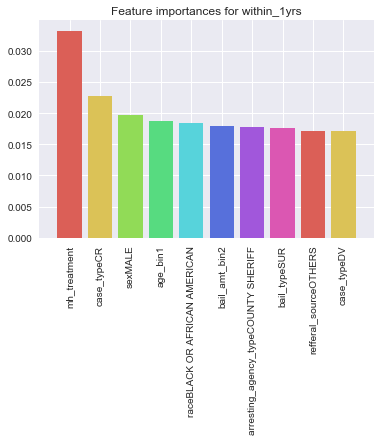

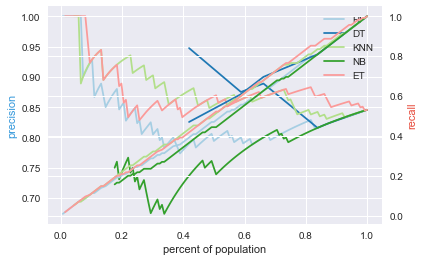

2012-04-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
43,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min...",0.640166,1.0,0.198529,0.052174,0.099174
97,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.529400,1.0,0.198529,0.052174,0.099174
63,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'auto', 'n_neighbors': 100, 'wei...",0.474534,1.0,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.269979,1.0,0.198529,0.052174,0.099174
2,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.446584,1.0,0.198529,0.052174,0.099174


Feature ranking for within_1yrs
1. bailed_out (0.030644)
2. bail_amt_bin3 (0.030138)
3. case_typeCR (0.025269)
4. bail_amt_bin4 (0.024305)
5. bail_amt_bin2 (0.023361)
6. age_bin2 (0.022499)
7. arresting_agency_typeCOUNTY SHERIFF (0.022036)
8. arresting_agency_typeCITY (0.021940)
9. age_bin3 (0.020934)
10. case_typeDV (0.020354)


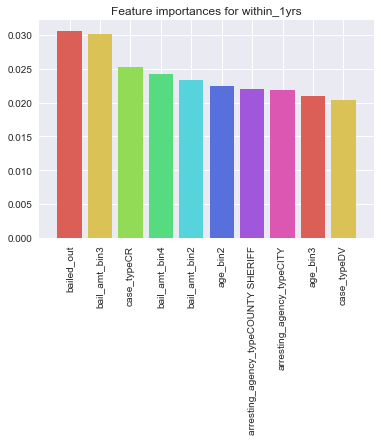

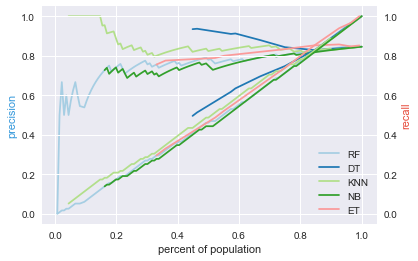

2011-10-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
40,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min...",0.671014,1.000000,0.198529,0.052174,0.099174
97,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.533954,1.000000,0.198529,0.052174,0.099174
66,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.451553,1.000000,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.291511,1.000000,0.198529,0.052174,0.099174
13,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 50, 'max_features': 'log2', 'min...",0.502484,0.666667,0.169118,0.034783,0.066116


Feature ranking for within_1yrs
1. bail_amt_bin3 (0.032686)
2. bailed_out (0.030064)
3. age_bin2 (0.029114)
4. age_bin1 (0.028856)
5. age_bin3 (0.024641)
6. case_typeCR (0.023733)
7. bail_amt_bin2 (0.023063)
8. bail_amt_bin4 (0.021446)
9. bail_amt_bin1 (0.020864)
10. case_typeDV (0.019654)


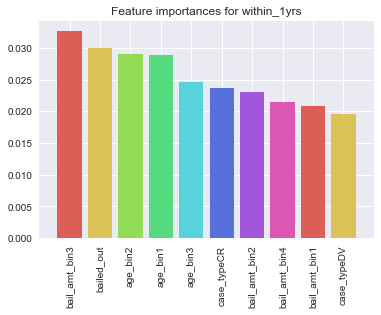

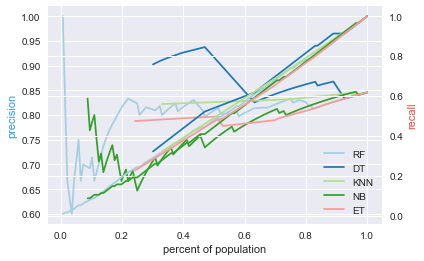

2011-04-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
25,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.594410,1.0,0.198529,0.052174,0.099174
101,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.497723,1.0,0.198529,0.052174,0.099174
67,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.433540,1.0,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.307246,1.0,0.198529,0.052174,0.099174
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.458385,1.0,0.198529,0.052174,0.099174


Feature ranking for within_1yrs
1. bail_amt_bin3 (0.034725)
2. bailed_out (0.033463)
3. case_typeCR (0.029056)
4. case_typeDV (0.027031)
5. age_bin2 (0.026709)
6. bail_amt_bin4 (0.025520)
7. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.024537)
8. bail_amt_bin2 (0.023814)
9. age_bin3 (0.023676)
10. bail_amt_bin1 (0.022458)


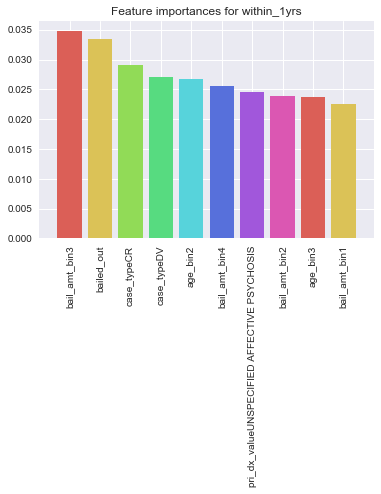

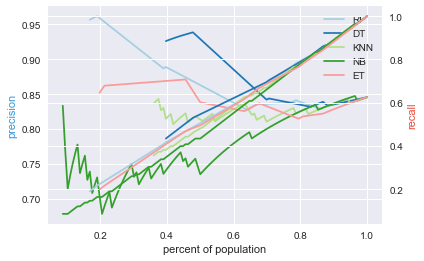

2010-10-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

,model_type,clf,parameters,auc-roc,precision_5,accuracy_5,recall_5,f1_5
43,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min...",0.506832,1.0,0.198529,0.052174,0.099174
117,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'entropy', 'max_depth': 50, 'max...",0.438716,1.0,0.198529,0.052174,0.099174
67,KNN,"KNeighborsClassifier(algorithm='kd_tree', leaf...","{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.419048,1.0,0.198529,0.052174,0.099174
88,NB,GaussianNB(priors=None),{},0.314907,1.0,0.198529,0.052174,0.099174
8,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.453416,1.0,0.198529,0.052174,0.099174


Feature ranking for within_1yrs
1. case_typeCR (0.028244)
2. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.028025)
3. bail_amt_bin3 (0.027986)
4. age_bin2 (0.024361)
5. age_bin3 (0.024004)
6. case_typeDV (0.023788)
7. age_bin1 (0.023677)
8. refferal_sourceOTHERS (0.023169)
9. bailed_out (0.023006)
10. bail_amt_bin4 (0.021427)


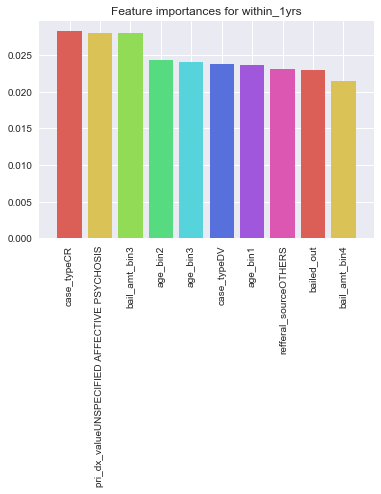

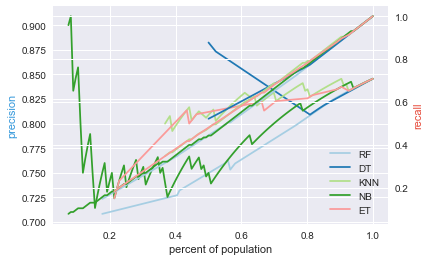

2010-04-29 00:00:00 2015-10-29 00:00:00 2015-10-30 00:00:00 2016-04-30 00:00:00 6


/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = pd.to_datetime(df[col1])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = pd.to_datetime(df[col2])
/Users/jeeyoon_song/Desktop/syntaxerror-mlpp2018/code/final_pipeline.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

RF
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 

KeyboardInterrupt: 

In [16]:
result = final_pipeline.temporal_eval(final_options.all_var, df)